<a href="https://colab.research.google.com/github/Regan17/Computer-Vision-Vehicle-classification-task/blob/main/Chirag_Arora_Classisfication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Download and Run Instructions:

# Download GloVe Embeddings:

# The project requires GloVe word embeddings. Download the pre-trained embeddings from http://nlp.stanford.edu/data/glove.6B.zip and extract the contents.
# Download the Dataset:

# Ensure you have the dataset (train.csv) available. You can adjust the path accordingly in the code.
# Install Required Libraries:

# Make sure you have the necessary Python libraries installed, including TensorFlow, scikit-learn, XGBoost, and others.
# # Key Steps:

# # Data Loading:

# # The project begins by loading the dataset from a CSV file, which includes columns for social media texts (text) and their corresponding sentiments (y).
# # Data Preprocessing:

# # The text data is preprocessed to prepare it for model training. This includes converting labels to numerical format, splitting the dataset into training and testing sets, and performing text tokenization and padding.
# # Naive Bayes Classifier:

# # A Multinomial Naive Bayes classifier is trained using the TF-IDF vectorization of the text data. Accuracy and confusion matrix are printed.
# # Random Forest Classifier:

# # A Random Forest classifier is trained using the CountVectorizer for text data. Accuracy and confusion matrix are printed.
# # Bidirectional LSTM Model:

# # An NLP model is constructed using a Bidirectional LSTM layer. The model uses pre-trained GloVe embeddings for text representation. Accuracy and confusion matrix are printed.
# # XGBoost Model:

# # A gradient boosting model using TF-IDF vectorization is trained. Accuracy and confusion matrix are printed.
# # Dense Neural Network:

# # A Dense Neural Network (DNN) is trained using a pipeline with CountVectorizer for text data. Accuracy and confusion matrix are printed.
# # Support Vector Machine (SVM):

# # An SVM model is trained using TF-IDF vectorization. Accuracy and confusion matrix are printed.



In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
import requests
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPClassifier
import seaborn as sns
from io import BytesIO
import zipfile

# Load the dataset
glove_url = 'http://nlp.stanford.edu/data/glove.6B.zip'
response = requests.get(glove_url)
with zipfile.ZipFile(BytesIO(response.content)) as zip_ref:
    zip_ref.extractall()
df = pd.read_csv('/content/train.csv')

# Preprocess the data
X = df['text']
y = df['y']

# Convert labels to numerical format
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Naive Bayes Classifier
vectorizer = TfidfVectorizer()
X_train_nb = vectorizer.fit_transform(X_train)
X_test_nb = vectorizer.transform(X_test)
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_nb, y_train)
y_pred_nb = nb_classifier.predict(X_test_nb)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
print(f'Naive Bayes Classifier Accuracy: {accuracy_nb}')
print(f'Confusion Matrix for Naive Bayes Classifier:\n{conf_matrix_nb}')

# Random Forest Classifier
vectorizer_rf = CountVectorizer()
X_train_rf = vectorizer_rf.fit_transform(X_train)
X_test_rf = vectorizer_rf.transform(X_test)
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_rf, y_train)
y_pred_rf = rf_classifier.predict(X_test_rf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print(f'Random Forest Classifier Accuracy: {accuracy_rf}')
print(f'Confusion Matrix for Random Forest Classifier:\n{conf_matrix_rf}')

# Bidirectional LSTM
embedding_dim = 50
embedding_path = 'glove.6B.50d.txt'
embeddings_index = {}
with open(embedding_path) as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

max_words = 5000
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

max_sequence_length = 100
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_sequence_length, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_sequence_length, padding='post', truncating='post')

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in tokenizer.word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_sequence_length, weights=[embedding_matrix], trainable=False))
model.add(SpatialDropout1D(0.2))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_padded, y_train, epochs=10, validation_data=(X_test_padded, y_test))
y_pred_prob = model.predict(X_test_padded)
y_pred_lstm = np.argmax(y_pred_prob, axis=1)
accuracy_lstm = accuracy_score(y_test, y_pred_lstm)
conf_matrix_lstm = confusion_matrix(y_test, y_pred_lstm)
print(f'Bidirectional LSTM Accuracy: {accuracy_lstm}')
print(f'Confusion Matrix for Bidirectional LSTM:\n{conf_matrix_lstm}')

# Gradient Booster Model using TF-IDF
vectorizer_xgb = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer_xgb.fit_transform(X_train)
X_test_tfidf = vectorizer_xgb.transform(X_test)
model_xgb = XGBClassifier(objective='multi:softmax', num_class=3)
model_xgb.fit(X_train_tfidf, y_train)
y_pred_xgb = model_xgb.predict(X_test_tfidf)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
print(f'Gradient Boosting Model Accuracy: {accuracy_xgb}')
print(f'Confusion Matrix for XGBoost Classifier:\n{conf_matrix_xgb}')

# Dense Neural Network
model_dnn = make_pipeline(CountVectorizer(stop_words='english'), MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=100))
model_dnn.fit(X_train, y_train)
y_pred_dnn = model_dnn.predict(X_test)
accuracy_dnn = accuracy_score(y_test, y_pred_dnn)
conf_matrix_dnn = confusion_matrix(y_test, y_pred_dnn)
print(f'Dense Neural Network Accuracy: {accuracy_dnn}')
print(f'Confusion Matrix for Dense Neural Network:\n{conf_matrix_dnn}')

# Support Vector Machine (SVM)
vectorizer_svm = TfidfVectorizer()
X_train_svm = vectorizer_svm.fit_transform(X_train)
X_test_svm = vectorizer_svm.transform(X_test)
svm_classifier = SVC()
svm_classifier.fit(X_train_svm, y_train)
y_pred_svm = svm_classifier.predict(X_test_svm)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print(f'Support Vector Machine Accuracy: {accuracy_svm}')
print(f'Confusion Matrix for Support Vector Machine:\n{conf_matrix_svm}')


Naive Bayes Classifier Accuracy: 0.654112501518649
Confusion Matrix for Naive Bayes Classifier:
[[2081    4 1038]
 [ 395   31 1085]
 [ 325    0 3272]]
Random Forest Classifier Accuracy: 0.7821649860284291
Confusion Matrix for Random Forest Classifier:
[[2268  272  583]
 [ 161 1175  175]
 [ 359  243 2995]]
Epoch 1/10
1029/1029 [==============================] - 20s 13ms/step - loss: 0.8814 - accuracy: 0.5866 - val_loss: 0.7881 - val_accuracy: 0.6510
Epoch 2/10
1029/1029 [==============================] - 12s 12ms/step - loss: 0.7999 - accuracy: 0.6425 - val_loss: 0.7283 - val_accuracy: 0.6879
Epoch 3/10
1029/1029 [==============================] - 12s 12ms/step - loss: 0.7627 - accuracy: 0.6664 - val_loss: 0.6942 - val_accuracy: 0.7040
Epoch 4/10
1029/1029 [==============================] - 13s 13ms/step - loss: 0.7326 - accuracy: 0.6807 - val_loss: 0.6786 - val_accuracy: 0.7185
Epoch 5/10
1029/1029 [==============================] - 12s 12ms/step - loss: 0.7106 - accuracy: 0.6973 - val

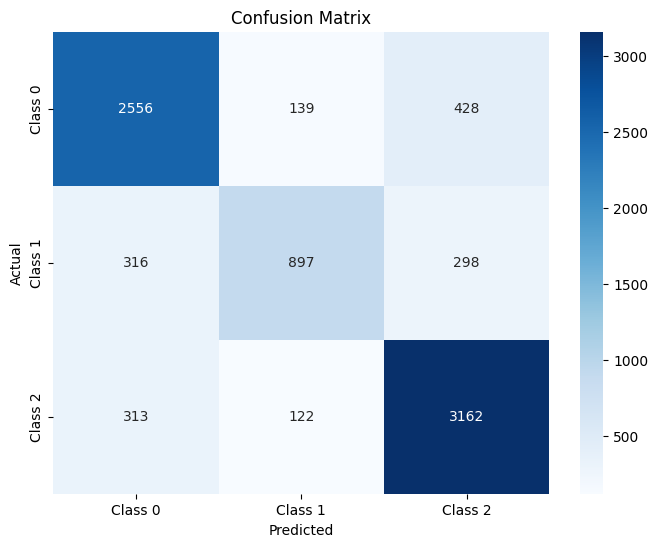

In [2]:
# TO VISUALISE THE CONFUSION MATRIX BELOW IS HEATMAP OF CONFUSION MATRIX OF SUPPORT VECTOR MACHINE MODEL
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()